# Fitting categorical mixtures: example

In this simple intro example, we use a dataset of aligned protein sequences
similar to green fluorescent protein (GFP). This is a very small dataset
(< 400 sequences) but will suffice to illustrate how to use the package
for a variety of tasks. You'll need to have seaborn, numpy, scipy
and of course categorical_mixture installed.

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from categorical_mixture.categorical_mix import CategoricalMixture

#Change this filepath to the location of the test data, which comes with the package
#or can be retrieved from the github.
if "test_data" not in os.listdir():
    os.chdir(os.path.join("..", ".."))

from test_scripts.encode_test_data import encode_seq_data
encode_seq_data(os.getcwd())

ray not installed! fitting with ray will not be an option.


We could also use the absolute filepath to the .npy file and make it
into a single item list then supply this to the fit function instead,
e.g. x = [filepath], with the same result. Supplying a list of .npy
files is preferable if the dataset is large. In this case it's
very small so working with data in memory is preferable.

In [2]:
x = np.load(os.path.join("test_data", "encoded_test_data.npy"))

Next, we'll evaluate the BIC (Bayes Information Criterion) and AIC
(Akaike Information Criterion) for different numbers of clusters,
using 3 restarts for each to boost our chances of finding the global
maximum for that setting. BIC tends to be more conservative and
prefer smaller numbers of clusters than AIC. Using 2 threads,
this took < 1.5 seconds for the whole procedure on our machine.

In [3]:
cluster_nums = [1,2,3,4,5,6,7,8,9,10]
bics, aics = [], []

import time
st = time.time()

for cnum in cluster_nums:
    cat_mix = CategoricalMixture(n_components=cnum, num_possible_items=21,
                                sequence_length=408)
    cat_mix.fit(x, max_iter=150, n_restarts=5, random_state=123,
               n_threads=2)
    bics.append(cat_mix.BIC(x))
    aics.append(cat_mix.AIC(x))
    
end_time = time.time()
print(f"NET TIME: {end_time - st} seconds")

Loss: -1365.7865168539327
Loss: -333.13035463483146
Loss: -333.13035463483146
Iterations: 2****************

Loss: -1366.645716292135
Loss: -333.13035463483146
Loss: -333.13035463483146
Iterations: 2****************

Loss: -1386.9152914325844
Loss: -333.13035463483146
Loss: -333.13035463483146
Iterations: 2****************

Loss: -1359.6648525280898
Loss: -333.13035463483146
Loss: -333.13035463483146
Iterations: 2****************

Loss: -1344.2903792134832
Loss: -333.13035463483146
Loss: -333.13035463483146
Iterations: 2****************

Loss: -1356.6537921348315
Loss: -286.67161165730334
Loss: -282.69114290730334
Loss: -281.9947331460674
Loss: -281.9947331460674
Iterations: 4****************

Loss: -1346.7154143258426
Loss: -312.12870874297755
Loss: -300.15840063202245
Loss: -298.16033181179773
Loss: -297.36863588483146
Loss: -297.2228976474719
Loss: -297.0515932233146
Loss: -296.68927756320227
Loss: -296.68927756320227
Iterations: 8****************

Loss: -1363.4022120786517
Loss: -3

Loss: -242.14848139044943
Iterations: 11****************

Loss: -1341.3348841292134
Loss: -256.01944346910113
Loss: -226.31936885533707
Loss: -221.05225158005618
Loss: -217.95698735955057
Loss: -217.20494645365167
Loss: -216.55806706460675
Loss: -216.55508251404495
Loss: -216.55508251404495
Iterations: 8****************

Loss: -1331.0301088483145
Loss: -239.80058374297752
Loss: -217.9264615519663
Loss: -215.40179511938203
Loss: -213.27291081460675
Loss: -213.2728669241573
Iterations: 5****************

Loss: -1332.2650983146068
Loss: -292.82770804073033
Loss: -263.3665949789326
Loss: -258.6080143960674
Loss: -256.11907478932585
Loss: -255.58953651685394
Loss: -254.52225245786516
Loss: -254.4507329705056
Loss: -254.4507329705056
Iterations: 8****************

Loss: -1342.7861657303372
Loss: -234.02521506320224
Loss: -217.62054511938203
Loss: -216.02703651685394
Loss: -216.0269926264045
Iterations: 4****************

Loss: -1348.6656425561798
Loss: -263.80833040730334
Loss: -238.35105775

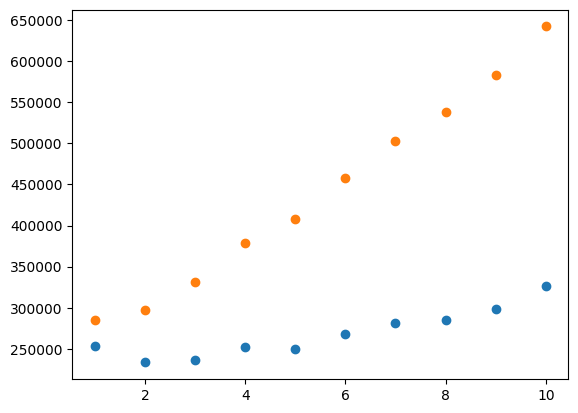

In [4]:
plt.scatter(cluster_nums, aics)
plt.scatter(cluster_nums, bics)

As expected, BIC is more conservative. Both metrics suggest 2 clusters is a good
number; AIC suggests 3 might also be acceptable.

In [5]:
cat_mix = CategoricalMixture(n_components=3, num_possible_items=21,
                                sequence_length=408)
#We'll use a slightly more restrictive tol here. 1e-3 is usually
#fine, but 1e-4 may mean slightly better results.
cat_mix.fit(x, max_iter=150, n_restarts=5, random_state=123, tol=1e-4,
               n_threads=2)

Loss: -1354.5147471910113
Loss: -289.68032391151684
Loss: -280.7262772120786
Loss: -280.07404318820227
Loss: -279.9786253511236
Loss: -279.78383953651684
Loss: -279.78383953651684
Iterations: 6****************

Loss: -1358.305389747191
Loss: -283.96025719803373
Loss: -274.4514791081461
Loss: -272.8921392205056
Loss: -271.9337034761236
Loss: -270.5669768258427
Loss: -269.1317810744382
Loss: -267.0198165379214
Loss: -264.77174771769666
Loss: -263.68306706460675
Loss: -263.2659102879214
Loss: -263.2659102879214
Iterations: 11****************

Loss: -1327.4231039325844
Loss: -307.55506056882024
Loss: -284.96580933988764
Loss: -280.9254301264045
Loss: -278.51718311095505
Loss: -276.4268565660112
Loss: -274.23729371488764
Loss: -273.2124297752809
Loss: -272.7997278792135
Loss: -272.3353449789326
Loss: -272.3353449789326
Iterations: 10****************

Loss: -1334.6049859550562
Loss: -303.16926351825845
Loss: -275.57309954353934
Loss: -274.0153397120786
Loss: -273.10496400983146
Loss: -272.50

Next, we'll score the training set, i.e. get the probability of each
input datapoint given the fitted model, to see what the distribution
of datapoint scores looks like. Then, we'll contrast this with
some sequences that are most definitely not from this dataset (decoys).
The decoys were generated by taking one of the sequences in the training
dataset and randomly mutating it at roughly 1 in 10 positions.

In [6]:
decoys = np.load(os.path.join("test_data", "decoys.npy"))

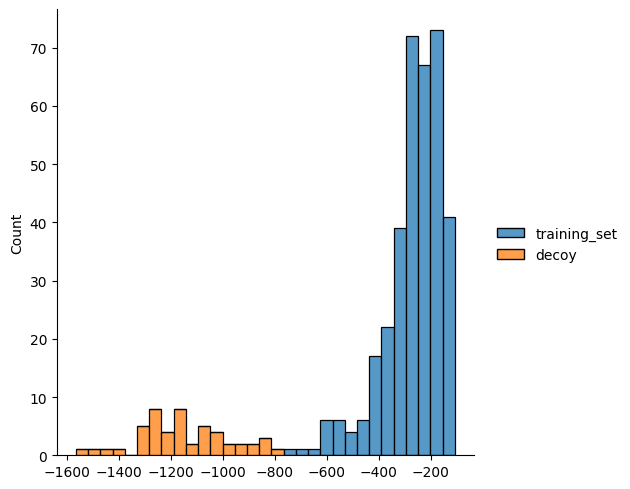

In [7]:
train_scores = cat_mix.score(x)
decoy_scores = cat_mix.score(decoys)
all_scores = np.concatenate([train_scores, decoy_scores])
labels = ["training_set" for i in train_scores.tolist()] + \
    ["decoy" for i in decoy_scores.tolist()]
sns.displot(x=all_scores, hue=labels, multiple="stack")

Remarkably, we can see that even though the decoys are mutants of
one of the sequences in the training set, the model can easily
distinguish them. That's because the mutants are substantially different
(on average, a random mutation every 10 positions). As you can see,
it's easy to use a categorical mixture to identify a distribution shift
(where the new data is substantially different from the old).

Now let's assign the training data sequences to clusters.

In [11]:
clust_preds = cat_mix.predict(x)
print(f"There are {np.sum(clust_preds==0)} sequences in cluster 1, "
      f"{np.sum(clust_preds==1)} in cluster 2, "
      f"{np.sum(clust_preds==2)} in cluster 3")

There are 15 sequences in cluster 1, 113 in cluster 2, 228 in cluster 3


Each cluster is a distribution across sequence space. Let's see what these clusters look
like. The class attribute "mu_mix" stores the probability of each element at
each position for each cluster.

In [ ]:
for i in range(3):
    